In [1]:
import numpy as np 
import matplotlib.pyplot as plt

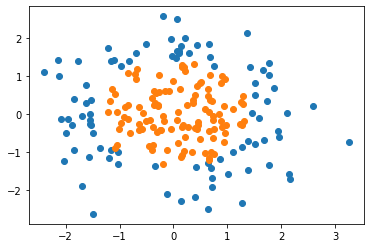

In [2]:
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 2, dtype='int')
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [4]:
from fun_machine_learning.logistic_regression import LogisticRegression

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
logi_reg = LogisticRegression()
logi_reg.fit(X,y)
logi_reg.score(X,y)

0.56

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


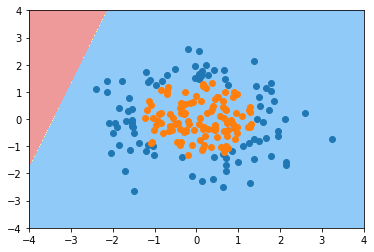

In [6]:
# Using 1 features clearly perform poorly
plot_decision_boundary(logi_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logi_reg', LogisticRegression())
    ])

In [16]:
poly_logi_reg = PolynomialLogisticRegression(7)
poly_logi_reg.fit(X, y)
poly_logi_reg.score(X, y)

/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/logistic_regression.py:22: RuntimeWarning: invalid value encountered in log
  return -np.sum(y*np.log(y_hat + (1-y)*np.log(1-y_hat))) / len(y)


0.98

/Users/ada/Documents/coding-workspace/JupyterNotebook/fun_machine_learning/logistic_regression.py:13: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-t))
/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


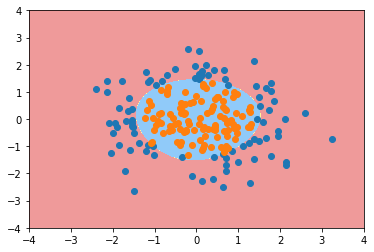

In [17]:
plot_decision_boundary(poly_logi_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Regularization

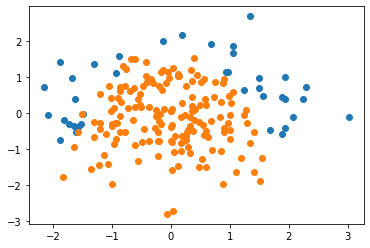

In [58]:
np.random.seed(500)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:,0]**2 + X[:,1] < 2, dtype='int')
# Add some noise
for _ in range(20):
    y[np.random.randint(200)] = 1
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


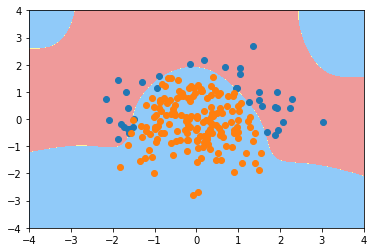

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
poly_logi_reg = PolynomialLogisticRegression(20)
poly_logi_reg.fit(X_train, y_train)
poly_logi_reg.score(X_test, y_test)
plot_decision_boundary(poly_logi_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### To avoid overfitting like the graph above, regularize the model

In [60]:
def PolynomialLogisticRegressionReg(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logi_reg', LogisticRegression(C=C))
    ])

reg_logi_reg = PolynomialLogisticRegressionReg(degree=20, C=0.1)
reg_logi_reg.fit(X_train, y_train)
reg_logi_reg.score(X_test, y_test)

0.96

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


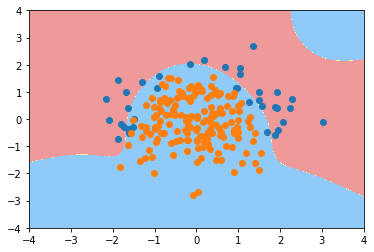

In [61]:
plot_decision_boundary(reg_logi_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [66]:
def PolynomialLogisticRegressionReg2(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('logi_reg', LogisticRegression(C=C, penalty=penalty))
    ])

reg_logi_reg2 = PolynomialLogisticRegressionReg2(degree=20, C=0.1, penalty='none')
reg_logi_reg2.fit(X_train, y_train)
reg_logi_reg2.score(X_test, y_test)

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.96

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  del sys.path[0]


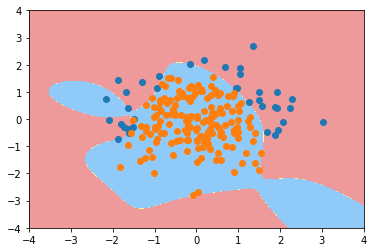

In [67]:
plot_decision_boundary(reg_logi_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## OvR (One vs. Rest) & OvO (One vs. One)

In [110]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [111]:
# By default, multi_class=ovr
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7894736842105263

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


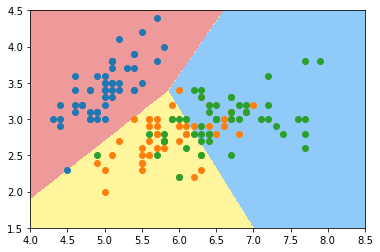

In [112]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [113]:
# OvO
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

/Users/ada/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


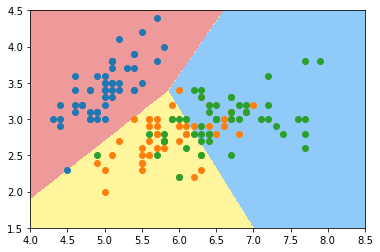

In [114]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

### This approch can be applied to any classification algorithm

In [115]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

0.8157894736842105

In [116]:
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.7894736842105263

In [129]:
A = np.array([[1,2],[3,4]])
B = np.array([[2],[2]])
C = A.dot(B)
A_inv = np.linalg.inv(A)
# A_inv
A_inv.dot(C)

array([[2.],
       [2.]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])